# 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

## 필요한 라이브러리 불러오기

In [1]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 데이터 불러오기

In [4]:
# 파일을 불러와 df 라는 변수에 담습니다.

df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_부산_202106.csv", sep=',')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,NaN,129.115397,35.143770
4,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819,48087.0,NaN,NaN,NaN,129.159641,35.164474


### 데이터 크기 보기

In [5]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(136517, 39)

### info 보기

In [6]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 39 columns):
상가업소번호       136517 non-null int64
상호명          136516 non-null object
지점명          18836 non-null object
상권업종대분류코드    136517 non-null object
상권업종대분류명     136517 non-null object
상권업종중분류코드    136517 non-null object
상권업종중분류명     136517 non-null object
상권업종소분류코드    136517 non-null object
상권업종소분류명     136517 non-null object
표준산업분류코드     123662 non-null object
표준산업분류명      123662 non-null object
시도코드         136517 non-null int64
시도명          136517 non-null object
시군구코드        136517 non-null int64
시군구명         136517 non-null object
행정동코드        136517 non-null int64
행정동명         136284 non-null object
법정동코드        136517 non-null int64
법정동명         136517 non-null object
지번코드         136517 non-null int64
대지구분코드       136517 non-null int64
대지구분명        136517 non-null object
지번본번지        136517 non-null int64
지번부번지        116948 non-null float64
지번주소         136517 non-null obje

### 결측치 보기

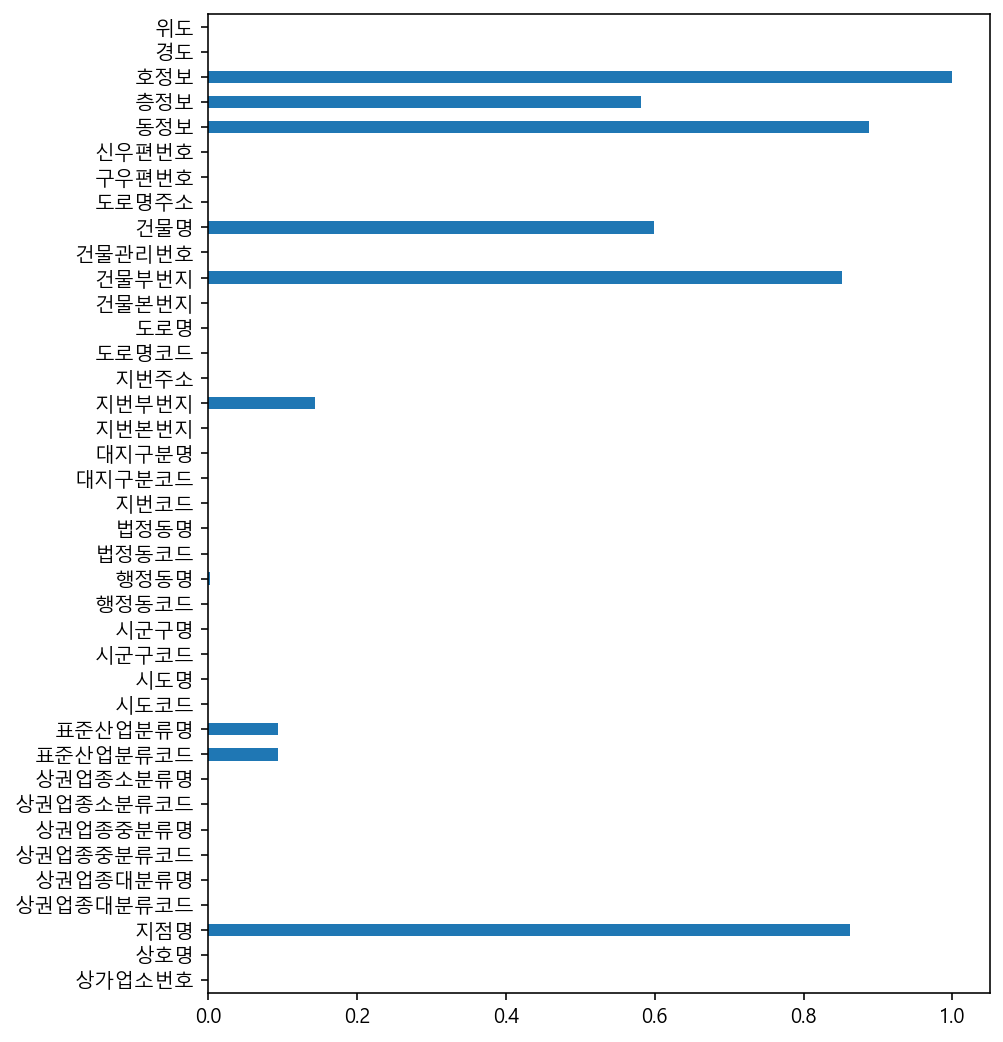

In [7]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.
df.isnull().mean().plot.barh(figsize=(7,9))

### 사용하지 않는 컬럼 제거하기

In [8]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
        '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
        '경도', '위도']

print(df.shape)
df = df[columns].copy()
df.shape

(136517, 39)


(136517, 11)

In [9]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 11 columns):
상호명         136516 non-null object
상권업종대분류명    136517 non-null object
상권업종중분류명    136517 non-null object
상권업종소분류명    136517 non-null object
시도명         136517 non-null object
시군구명        136517 non-null object
행정동명        136284 non-null object
법정동명        136517 non-null object
도로명주소       136517 non-null object
경도          136517 non-null float64
위도          136517 non-null float64
dtypes: float64(2), object(9)
memory usage: 11.5+ MB


## 색인으로 서브셋 가져오기
### 부산만 따로 보기

In [30]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.

df_busan = df[df["시도명"]=="부산광역시"].copy()
print(df_busan.shape)
df_busan.head()

(136517, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,도란도란,음식,한식,한식/백반/한정식,부산광역시,부산진구,개금1동,개금동,부산광역시 부산진구 가야대로482번길 29-3,129.024938,35.151645
1,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
2,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,부산광역시 동래구 동래로147번길 18,129.087156,35.205267
3,스텔라,소매,의복의류,일반의류,부산광역시,수영구,남천2동,남천동,부산광역시 수영구 광안해변로 100,129.115397,35.143770
4,정성밥상,음식,한식,한식/백반/한정식,부산광역시,해운대구,우1동,우동,부산광역시 해운대구 해운대로 635-7,129.159641,35.164474


In [31]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.

df_busan["시군구명"].unique()

array(['부산진구', '중구', '동래구', '수영구', '해운대구', '사상구', '강서구', '사하구', '북구',
       '남구', '영도구', '서구', '동구', '연제구', '기장군', '금정구'], dtype=object)

In [32]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.
df_busan["시군구명"].nunique()

16

## 스타벅스, 이디야 위치 분석

In [36]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

df_busan["상호명_소문자"] = df_busan["상호명"].str.lower()

In [37]:
df_busan[df_busan["상호명_소문자"].isnull()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자


In [35]:
df_busan.loc[44355, "상호명"] = "이름없음"

In [38]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_busan.loc[df_busan["상호명_소문자"].str.contains("스타벅스"), "상호명_소문자"].shape

(121,)

In [39]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_busan.loc[df_busan["상호명_소문자"].str.contains("이디야"), "상호명_소문자"].shape

(114,)

In [73]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_starbucks = df_busan[df_busan["상호명_소문자"].str.contains('스타벅스|이디야')].copy()
df_starbucks.shape

(235, 12)

In [74]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.
df_starbucks.loc[df_starbucks["상호명_소문자"].str.contains("이디야"), "브랜드명"] = "이디야"
df_starbucks[["상호명", "브랜드명"]].head()

,상호명,브랜드명
302,이디야커피,이디야
767,이디야커피,이디야
1007,이디야커피,이디야
2759,스타벅스,NaN
5798,스타벅스,NaN


In [75]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.


df_starbucks["브랜드명"] = df_starbucks["브랜드명"].fillna("스타벅스")
df_starbucks["브랜드명"]

302        이디야
767        이디야
1007       이디야
2759      스타벅스
5798      스타벅스
          ... 
134241    스타벅스
134357    스타벅스
134901    스타벅스
135349    스타벅스
135389    스타벅스
Name: 브랜드명, Length: 235, dtype: object

In [76]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_starbucks["상권업종대분류명"].value_counts()

음식    235
Name: 상권업종대분류명, dtype: int64

In [77]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_starbucks[df_starbucks["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명


In [78]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_starbucks = df_starbucks[~df_starbucks["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_starbucks.shape

(235, 13)

### 범주형 값으로 countplot 그리기

In [79]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_starbucks["브랜드명"].value_counts()
brand_count

스타벅스    121
이디야     114
Name: 브랜드명, dtype: int64

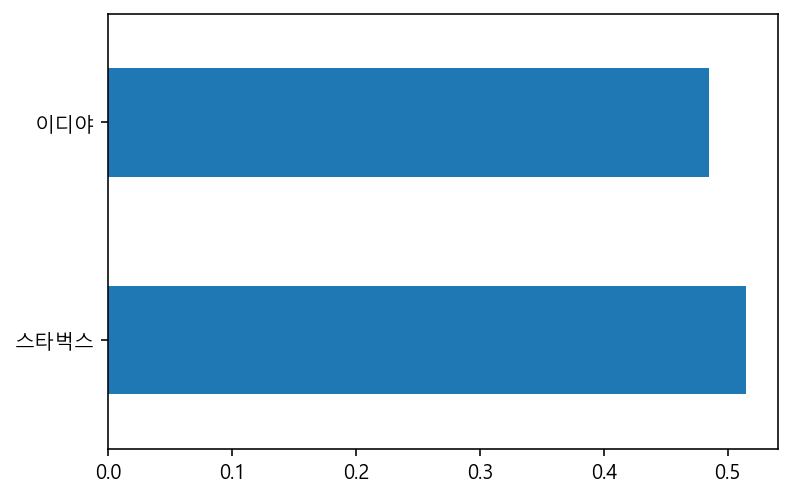

In [80]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_starbucks["브랜드명"].value_counts(normalize=True).plot.barh()

In [81]:
brand_count.index

Index(['스타벅스', '이디야'], dtype='object')

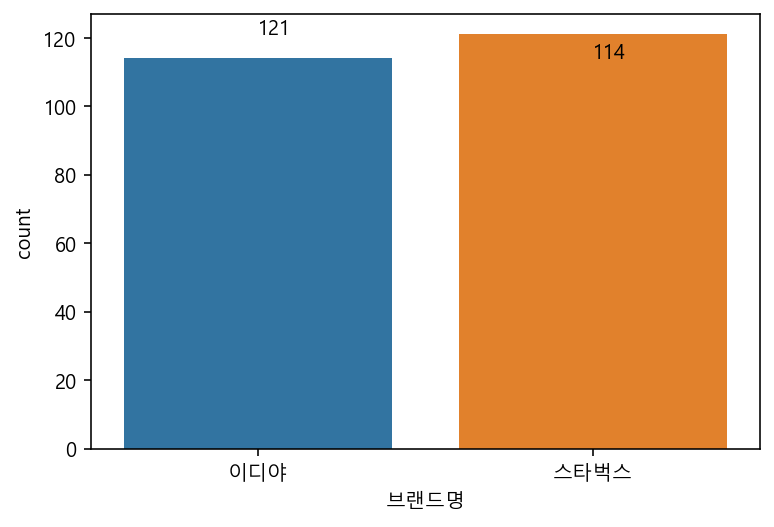

In [83]:
# countplot 을 그립니다.

g = sns.countplot(data=df_starbucks, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])


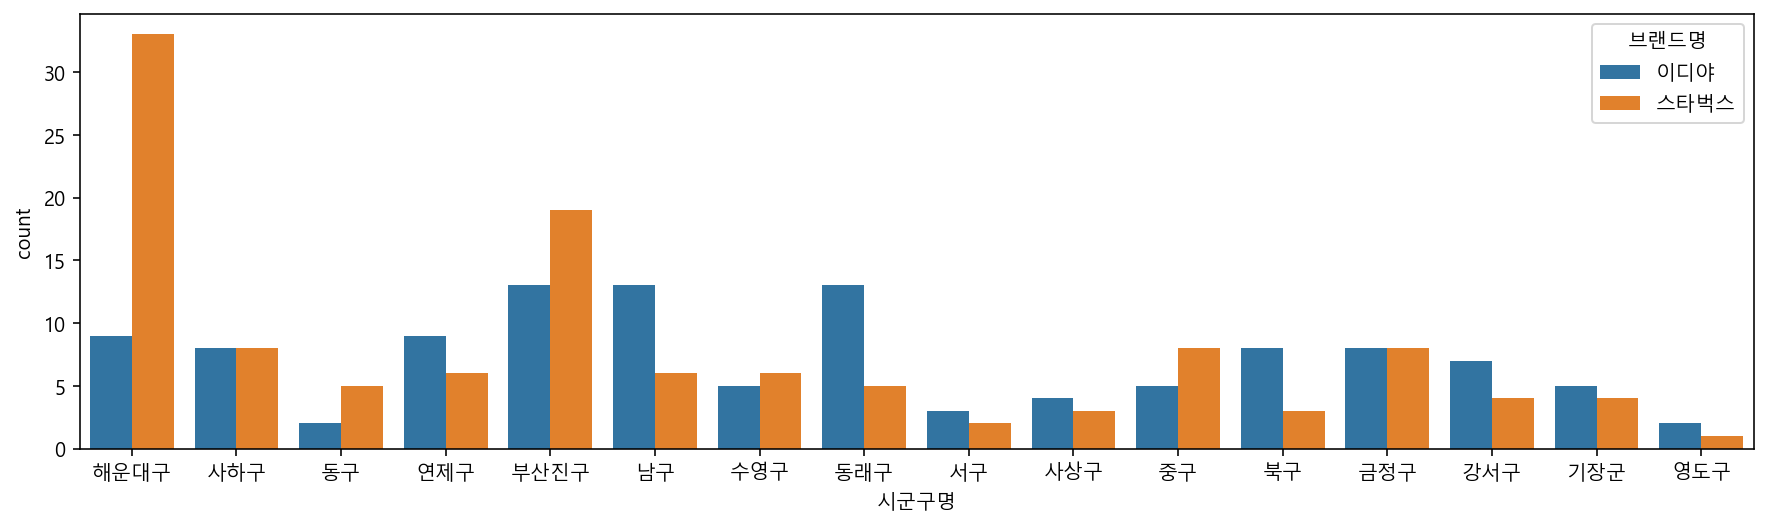

In [84]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.

plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_starbucks, x="시군구명", hue="브랜드명")

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

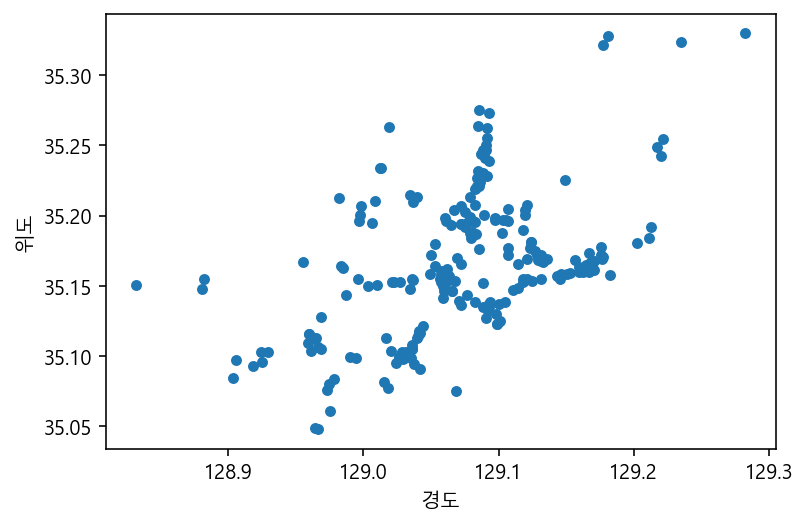

In [85]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
df_starbucks[["위도", "경도"]].plot.scatter(x="경도", y="위도")

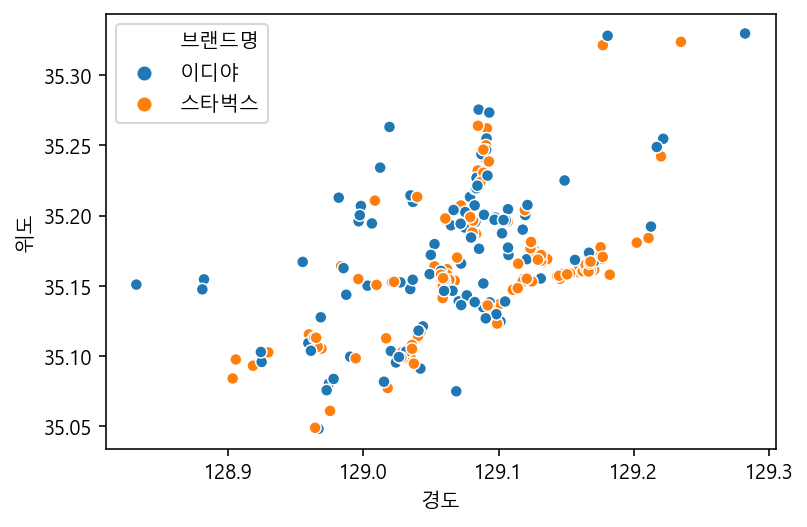

In [86]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

sns.scatterplot(data=df_starbucks, x="경도", y="위도", hue="브랜드명")

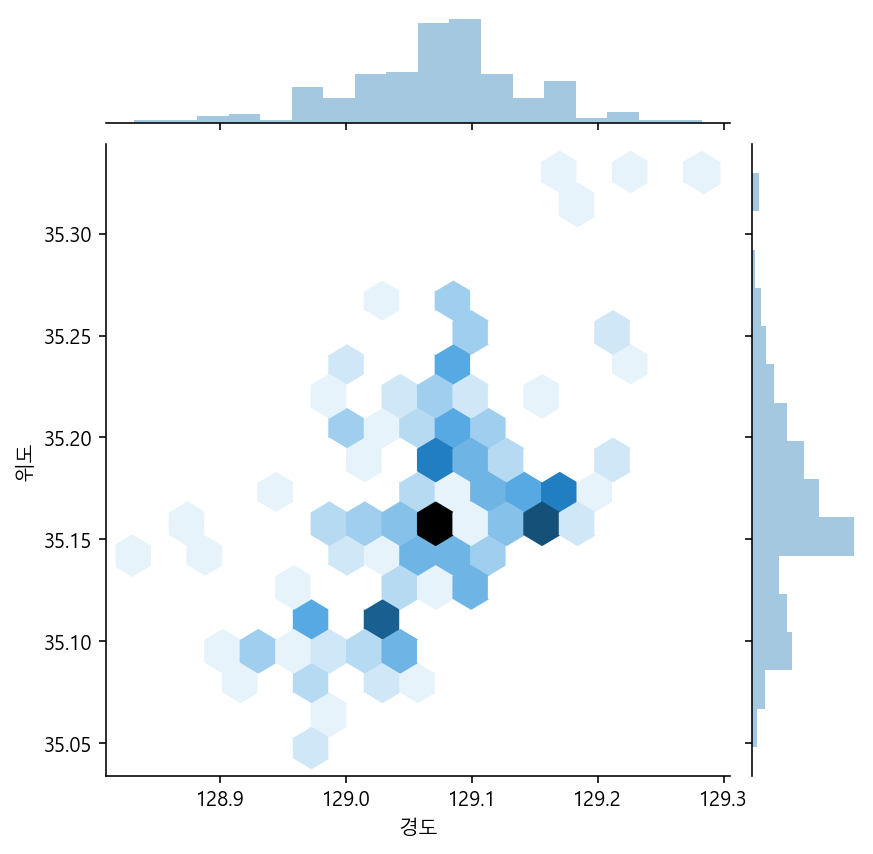

In [87]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.

sns.jointplot(data=df_starbucks, x="경도", y="위도", kind="hex")

## Folium 으로 지도 활용하기

In [88]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium

In [89]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_starbucks["위도"].mean()
long = df_starbucks["경도"].mean()

In [134]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map([lat, long])
folium.Marker(
    [35.161347, 129.168037],
    popup='<i>베스킨라빈스</i>',
    tooltip="베스킨라빈스").add_to(m)
m

In [91]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.

df_starbucks.sample(random_state=31)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
48545,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,해운대구,중1동,중동,부산광역시 해운대구 달맞이길 30,129.168037,35.161347,스타벅스,스타벅스


In [88]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.
# m.save(index.html)

###  부산의 스타벅스와 이디야 매장 분포

In [92]:
# 데이터프레임의 인덱스만 출력합니다.

df_starbucks.index

Int64Index([   302,    767,   1007,   2759,   5798,   6543,   6573,   7487,
              8642,   9039,
            ...
            129644, 130187, 131614, 133359, 133918, 134241, 134357, 134901,
            135349, 135389],
           dtype='int64', length=235)

### 기본 마커로 표현하기

In [135]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat, long], zoom_start=12)

for i in df_starbucks.index:
    
    sub_lat = df_starbucks.loc[i, "위도"]
    sub_long = df_starbucks.loc[i, "경도"]
    title = df_starbucks.loc[i, "상호명"] + " - " + df_starbucks.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_starbucks.loc[i, "브랜드명"] == "스타벅스":
        icon_color = "green"
    
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)
m.save('img.html')    
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [136]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_starbucks.index:
    
    sub_lat = df_starbucks.loc[i, "위도"]
    sub_long = df_starbucks.loc[i, "경도"]
    title = df_starbucks.loc[i, "상호명"] + " - " + df_starbucks.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_starbucks.loc[i, "브랜드명"] == "스타벅스":
        icon_color = "green"
    
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)
    
m

## Heatmap 으로 그리기

In [127]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기
heat = df_starbucks[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].str.strip()
heat["브랜드명"] = heat["브랜드명"].replace("스타벅스", 1).replace("이디야", 1)
heat = heat.values
heat

array([[ 35.22503232, 129.14885771,   1.        ],
       [ 35.04820024, 128.96669008,   1.        ],
       [ 35.12113291, 129.04391983,   1.        ],
       [ 35.116346  , 129.04083097,   1.        ],
       [ 35.18696704, 129.08334393,   1.        ],
       [ 35.18543147, 129.08067749,   1.        ],
       [ 35.08046277, 128.97446129,   1.        ],
       [ 35.10535037, 128.96887808,   1.        ],
       [ 35.15704958, 129.06303721,   1.        ],
       [ 35.15169245, 129.0887368 ,   1.        ],
       [ 35.10649952, 128.96607264,   1.        ],
       [ 35.16902955, 129.12097759,   1.        ],
       [ 35.22130754, 129.08560154,   1.        ],
       [ 35.1529624 , 129.0572989 ,   1.        ],
       [ 35.11266525, 129.01676029,   1.        ],
       [ 35.16988702, 129.13248267,   1.        ],
       [ 35.16398668, 128.98342565,   1.        ],
       [ 35.04894119, 128.96419962,   1.        ],
       [ 35.16143752, 129.17078223,   1.        ],
       [ 35.15793626, 129.18232

In [128]:
# HeatMap 그리기

from folium.plugins import HeatMap


m = folium.Map([lat, long], tiles="stamentoner", zoom_start=12)

HeatMap(heat).add_to(m)

# m.save("Heatmap.html")

m